# 1. Цветовая обработка изображения

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio.v3 as iio

## Загрузка цветного изображения 

In [16]:
img = iio.imread('hw_1.png')
img = img.astype(np.float32) / 255.
print(img.shape)

(1080, 1080, 4)


In [17]:
print(img[:5, :5, :])

[[[0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]]

 [[0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]]

 [[0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]]

 [[0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]
  [0.70980394 0.6627451  0.61960787 1.        ]]

 [[0.70980394 0.6627451  0.61960

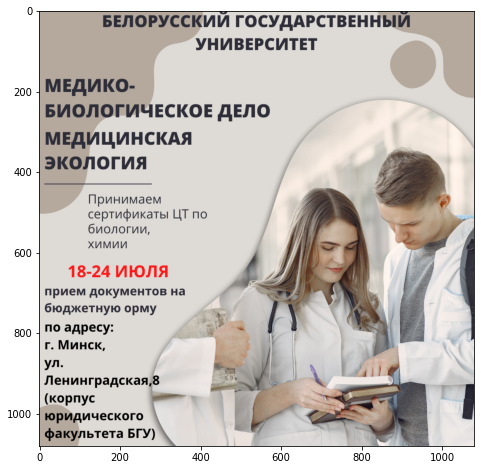

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

## Визуализация каналов изображения

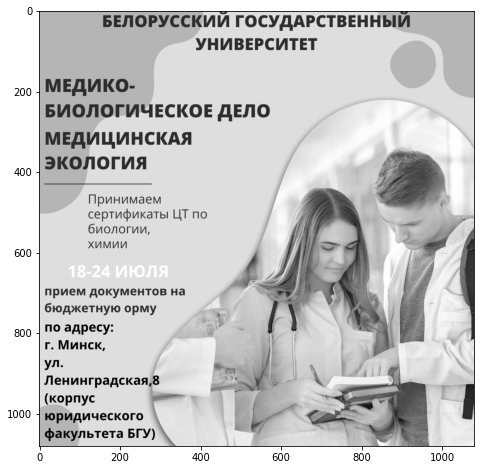

In [4]:
plt.figure(figsize=(8, 8))
plt.imshow(img[:, :, 0], cmap='gray') # Red

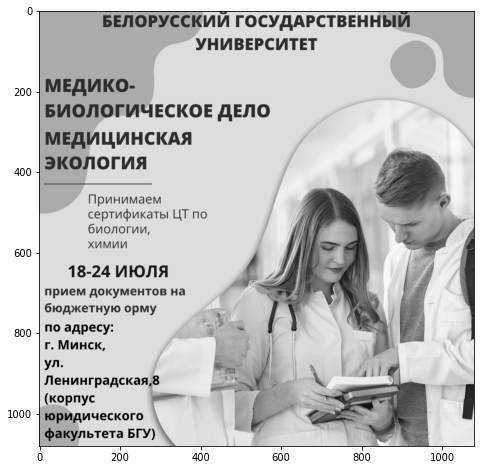

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(img[:, :, 1], cmap='gray') # Green

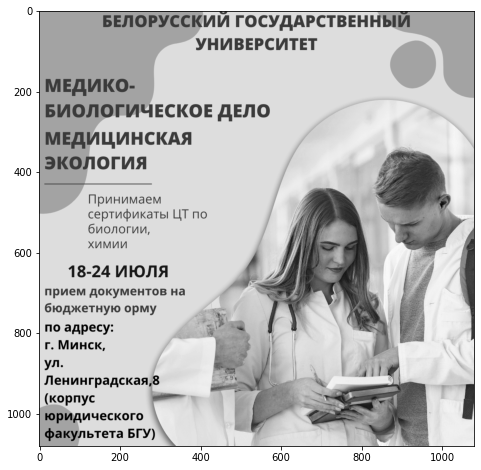

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(img[:, :, 2], cmap='gray') # Blue

## Нелинейное уменьшение яркости

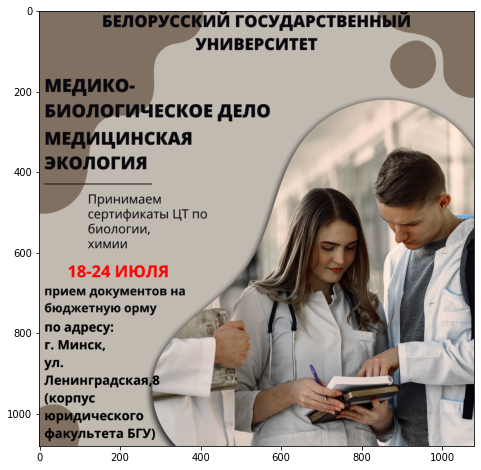

In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(img**2) # возведение в квадрат

## Нелинейное увеличение яркости

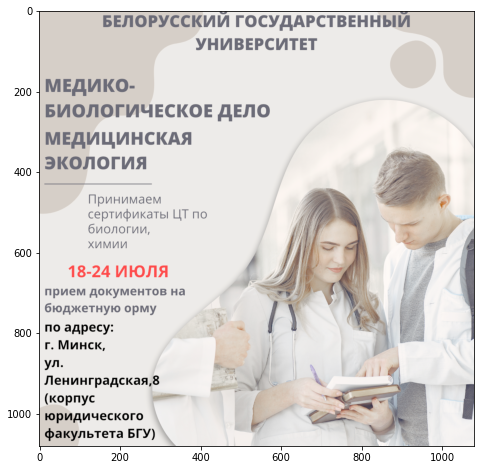

In [8]:
plt.figure(figsize=(8, 8))
plt.imshow(img**0.5) # извлечение квадратного корня

## Получение ЧБ изображения по цветному

In [9]:
img_bw = np.mean(img, axis=2)

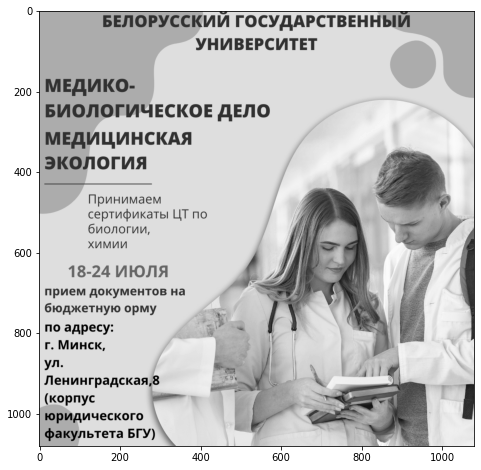

In [10]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

# 2. Перевод в другое цветовое пространство

## Цветовое пространство HSV

In [14]:
from skimage.color import rgb2hsv, hsv2rgb

In [18]:
img_copy = img[:,:,:3] # так как изображение имело 4 канала, а для преобразования функция просит три, то оставил первые три канала

In [19]:
img_hsv = rgb2hsv(img_copy)

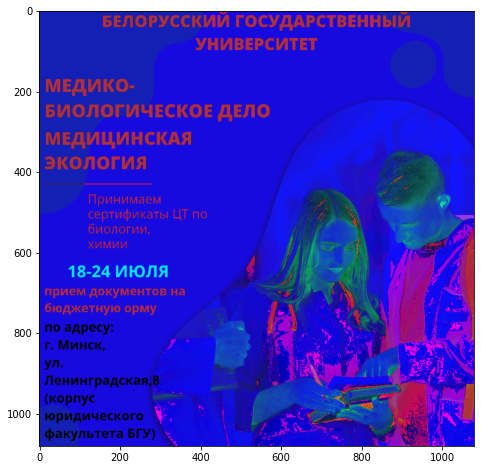

In [20]:
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

## Линейное увеличение насыщенности

In [21]:
img_hsv[:, :, 1] *= 2
img_new = hsv2rgb(img_hsv)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


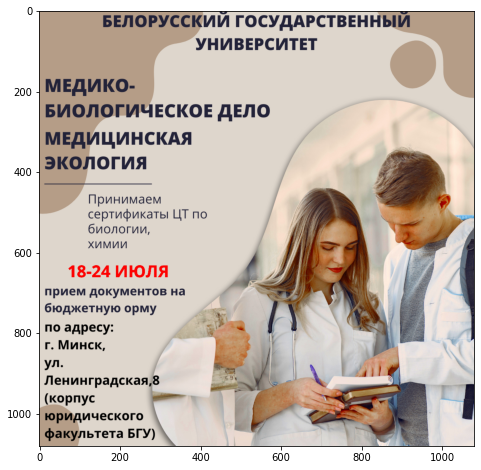

In [22]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

# 3. Фильтрация

## Ядро свёртки

In [26]:
win_size = (15, 15) # размер окна
sigma = 5

In [27]:
w = np.zeros(win_size, dtype=np.float32)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                            -(j-w.shape[1]//2)**2 / sigma**2 / 2)
w = w / np.sum(w)

## Свёртка через библиотеку scipy.signal

In [23]:
import scipy.signal

In [28]:
out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

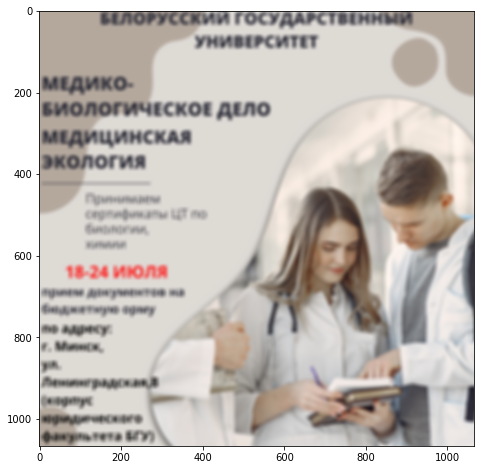

In [29]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)